## Natural Language Processing
[original code](https://github.com/joelgrus/data-science-from-scratch/blob/master/code/natural_language_processing.py)

In [21]:
from natural_language_processing import * 
%matplotlib inline
import matplotlib.pyplot as plt

### Gibbs Sampling

Generates samples from multidimensional distributions when we only know some of the conditional distributions. We use it when direct sampling is difficult.

Example rolling 2 dice:

every sample is (x,y), where x is the 1st die and y is the sum of both.

In [22]:
# getting direct samples is easy in this case
print direct_sample()

(5, 6)


In [23]:
# but if we only knew the conditional probabilities, y_given_x, and x_given_y, we need to use Gibbs sampling

def random_x_given_y(y):
    if y <= 7:
        return random.randrange(1, y)
    return random.randrange(y-6, 7)

def random_y_given_x(x):
    return x + roll_a_die()


In [24]:
def gibbs_sample(num_iters=100):
    x,y=1,2
    for x in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

print gibbs_sample()

(4, 10)


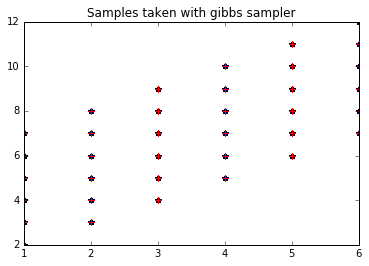

In [25]:
# Samples with Gibbs
gtotals, gxs = [], []
for x in range(1000):
    x,y = gibbs_sample()
    gxs.append(x)
    gtotals.append(y)
    
# Direct samples
totals, xs = [], []
for x in range(1000):
    x,y = direct_sample()
    xs.append(x)
    totals.append(y)
    

plt.title('Samples taken with gibbs sampler')
plt.plot(gxs, gtotals, 'b*')
plt.plot(xs, totals, 'r+')
plt.show()

### Topic modeling - Latent Dirichlet Analysis (LDA)
Latent ~= hidden

Given a set of documents, it identifies relationship between common topics.

Wikipedia: analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. LSA assumes that words that are close in meaning will occur in similar pieces of text. 

##### Assumptions:

  a. There is some fixed number K of topics.
    
  b. There is a random variable that assigns each topic a probability distribution over words. Probability of seeing _w_ word given topic k.
    
  c. There is a random variable that assigns each document a probability distribution over topics. Mixture of topics _k_ word in document _d_.
  
  d. Each word in a document was generated first randomly by picking a topic (from the document's distribution of topics) and them randomly by picking a word (from the topic distribution of words).
  
  


In [26]:
documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

K = 4

We need to generate *document_topics* that assigns a topic to each word. So, the word ```documents[3][4]``` was generated from  ```document_topic[3][4]```.

We do it using Gibbs Sampler.

```
  a. We assign randomly a topic to each word in every document
  b. We go through each document, one word at a time.
     for that word, document:
       b.1. create weights for each topic. That will depend on the current distribution of topics in the current document, and the current distribution of words for that topic..
       b.2 use the weights to find a new topic for that word.
```

Iterate many times.

##### b.1 Creates the weights one, for each topic K

In [27]:
# this creates the a weight
def topic_weight(d, word, k):
    """given a document and a word in that document,
    return the weight for the k-th topic"""

    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

##### b.2 Find a new topic using new weights

In [28]:
def sample_from(weights):
    total = sum(weights)
    rnd = total * random.random()       # uniform between 0 and total
    for i, w in enumerate(weights):
        rnd -= w                        # return the smallest i such that
        if rnd <= 0: return i           # sum(weights[:(i+1)]) >= rnd


def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k)
                        for k in range(K)])

## Running the example using gensim library

In [29]:
from gensim import corpora, models, similarities
from gensim.models import hdpmodel, ldamodel
from itertools import izip

dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(document) for document in documents]

lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5)
corpus_lda = lda[corpus]

for i in range(0, lda.num_topics-1):
    print lda.print_topic(i)
    print

0.074*regression + 0.074*databases + 0.074*libsvm + 0.074*MongoDB + 0.074*HBase + 0.074*Postgres + 0.074*MySQL + 0.074*machine learning + 0.074*decision trees + 0.013*R

0.074*regression + 0.074*Python + 0.074*R + 0.074*probability + 0.074*statistics + 0.074*Big Data + 0.074*Hadoop + 0.074*MapReduce + 0.074*Java + 0.013*HBase

0.109*Python + 0.108*R + 0.059*Java + 0.059*C++ + 0.059*statistics + 0.059*Haskell + 0.059*programming languages + 0.059*probability + 0.059*mathematics + 0.059*theory

0.099*deep learning + 0.099*artificial intelligence + 0.099*neural networks + 0.054*R + 0.054*probability + 0.054*Mahout + 0.054*Big Data + 0.054*scikit-learn + 0.054*C++ + 0.054*machine learning

